In [4]:
# Import the required library

import tensorflow.contrib.layers as lays
import numpy as np
from skimage import transform
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 

def autoencoder(inputs):
    # encoder
    # 28 x 28 x 1   ->  14 x 14 x 32
    # 14 x 14 x 32  ->  7 x 7 x 16
    # 7 x 7 x 16    ->  7 x 7 x 8
    net = lays.conv2d(inputs, 32, [3, 3], stride=2, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d(net, 16, [3, 3], stride=1, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d(net, 8, [3, 3], stride=1, padding='SAME')
    print(net.get_shape())
    # decoder
    # 7 x 7 x 8    ->  7 x 7 x 16
    # 7 x 7 x 16   ->  14 x 14 x 32
    # 14 x 14 x 32  ->  28 x 28 x 1
    net = lays.conv2d_transpose(net, 16, [3, 3], stride=1, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d_transpose(net, 32, [3, 3], stride=2, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d_transpose(net, 1, [3, 3], stride=1, padding='SAME', activation_fn=tf.nn.tanh)
    print(net.get_shape())
    return net

ae_inputs = tf.placeholder(tf.float32, (None, 6, 246, 1))  # input to the network (MNIST images)
ae_outputs = autoencoder(ae_inputs)  # create the Autoencoder network

# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# initialize the network
init = tf.global_variables_initializer()

batch_size = 512  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate

(?, 2, 123, 32)
(?, 2, 123, 16)
(?, 2, 123, 8)
(?, 2, 123, 16)
(?, 4, 246, 32)
(?, 4, 246, 1)


ValueError: Dimensions must be equal, but are 4 and 3 for 'sub_3' (op: 'Sub') with input shapes: [?,4,246,1], [?,3,246,1].

In [16]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    
    return np.asarray(data_shuffle)

In [2]:
!gsutil -m cp gs://di_og/data/mff_20180506_seg1_*_pid.csv ./data/

Copying gs://di_og/data/mff_20180506_seg1_eval_pid.csv...
Copying gs://di_og/data/mff_20180506_seg1_train_pid.csv...
| [2/2 files][  1.1 GiB/  1.1 GiB] 100% Done  55.8 MiB/s ETA 00:00:00           
Operation completed over 2 objects/1.1 GiB.                                      


In [5]:
import pandas as pd

train = pd.read_csv('data/mff_20180506_seg1_train_pid.csv', names=['f'+str(i) for i in range(1477)])

In [6]:
train_data = train.drop('f0', axis=1).values[:,0:738]

In [7]:
train_data.shape

(34893, 738)

In [17]:
batch_per_ep = train_data.shape[0] // batch_size

In [18]:
sess = tf.Session()
sess.run(init)

losses = []
for ep in range(epoch_num):  # epochs loop
    for batch_n in range(batch_per_ep):  # batches loop
        batch_img = next_batch(batch_size, train_data)  # read a batch
        batch_img = batch_img.reshape((-1, 3, 246, 1))               # reshape each sample to an (28, 28) image
        _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img})
        print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))
        losses.append(c)

Epoch: 1 - cost= 2.73546
Epoch: 1 - cost= 2.53622
Epoch: 1 - cost= 2.45175
Epoch: 1 - cost= 2.56932
Epoch: 1 - cost= 2.28262
Epoch: 1 - cost= 2.18223
Epoch: 1 - cost= 2.23242
Epoch: 1 - cost= 2.35224
Epoch: 1 - cost= 2.17111
Epoch: 1 - cost= 2.15200
Epoch: 1 - cost= 2.17690
Epoch: 1 - cost= 2.12556
Epoch: 1 - cost= 2.15228
Epoch: 1 - cost= 2.17918
Epoch: 1 - cost= 2.18183
Epoch: 1 - cost= 2.22741
Epoch: 1 - cost= 2.11027
Epoch: 1 - cost= 2.13709
Epoch: 1 - cost= 2.10374
Epoch: 1 - cost= 3.35163
Epoch: 1 - cost= 2.15511
Epoch: 1 - cost= 2.10056
Epoch: 1 - cost= 2.11469
Epoch: 1 - cost= 2.07257
Epoch: 1 - cost= 2.03061
Epoch: 1 - cost= 2.06487
Epoch: 1 - cost= 2.06216
Epoch: 1 - cost= 2.16341
Epoch: 1 - cost= 2.19968
Epoch: 1 - cost= 2.19466
Epoch: 1 - cost= 2.13848
Epoch: 1 - cost= 2.15585
Epoch: 1 - cost= 2.12709
Epoch: 1 - cost= 2.19728
Epoch: 1 - cost= 2.07531
Epoch: 1 - cost= 2.12077
Epoch: 1 - cost= 2.12190
Epoch: 1 - cost= 2.09061
Epoch: 1 - cost= 2.09616
Epoch: 1 - cost= 2.18866


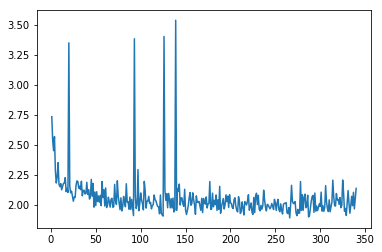

In [19]:
t = []
for i in range(len(losses)):
    t.append((i+1, losses[i]))
    
plt.plot(*zip(*t))
plt.show()